In [1]:
import pandas as pd
import numpy as np
import utils
from TradingAgent import PairsTradingAgent
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../data/raw_data.csv", index_col=0)
raw_data.index = pd.to_datetime(raw_data.index)
raw_data.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,40.689999,40.910000,26.337500,57.610001,42.930000,22.950001,101.830002,91.970001,54.439999,35.840000,...,124.980133,29.83,68.769997,35.700001,77.459999,36.080002,51.912292,98.844658,66.489998,47.270000
2016-01-05,40.549999,40.520000,25.677500,57.369999,42.919998,23.033333,102.360001,92.339996,54.040001,36.240002,...,125.839996,29.90,70.070000,36.060001,78.120003,36.070000,51.782890,100.902916,64.820000,48.009998
2016-01-06,40.730000,41.230000,25.174999,57.380001,42.560001,23.070000,102.160004,91.019997,51.740002,35.360001,...,125.839996,29.24,66.440002,36.439999,77.470001,35.619999,51.416248,101.339806,62.230000,48.020000
2016-01-07,39.000000,40.450001,24.112499,57.209999,41.540001,23.046667,99.160004,89.110001,50.419998,34.520000,...,114.949997,28.16,60.189999,36.580002,76.230003,34.700001,49.662113,99.009712,59.410000,46.560001
2016-01-08,38.590000,40.369999,24.240000,55.650002,40.669998,22.806667,98.199997,87.849998,49.980000,34.389999,...,116.620003,27.90,57.740002,36.180000,74.690002,34.369999,48.986340,98.592232,59.250000,45.880001


In [3]:
trading_pairs = pd.read_csv("./top_trading_pairs.csv", index_col=0)
trading_pairs.head(n=10)

,leg1,leg2,coint_t,coint_pvalue,hedge_ratio,adf_pvalue,hurst_exponent,half_life,zero_cross,best_threshold,best_return
901,DUK,ENPH,-3.922743,0.009225,7.188884,0.006725,0.409722,52.154031,111,0.95,10.517144
849,DLTR,ENPH,-3.673073,0.019838,2.724662,0.018532,0.407459,70.402656,59,0.80,10.195229
742,CZR,ETSY,-4.411852,0.001703,2.288153,0.006295,0.440650,57.508409,60,1.60,8.490281
744,CZR,NKE,-4.245217,0.003112,1.159681,0.013336,0.407289,65.688975,38,1.20,8.342575
319,APTV,ETSY,-4.130476,0.004638,1.955878,0.001353,0.376077,46.333395,121,0.90,7.031082
741,CZR,EPAM,-4.372294,0.001970,5.230379,0.014134,0.456380,74.706082,40,1.55,6.760948
1287,HOLX,TSLA,-3.800707,0.013526,6.041251,0.013859,0.449642,64.927930,87,0.85,6.687967
1045,ENPH,JNJ,-4.055910,0.005967,0.186662,0.000147,0.405688,39.557506,83,0.90,6.653791
159,ALGN,CZR,-5.141951,0.000090,0.147969,0.000114,0.373032,34.104557,92,1.70,6.388090
970,DXCM,SPGI,-3.792384,0.013876,2.452707,0.002625,0.413481,48.201554,55,0.85,6.118240


In [12]:
for i in range(len(trading_pairs)):
    trading_pair = trading_pairs.iloc[i]
    leg1 = trading_pair.loc["leg1"]
    leg2 = trading_pair.loc["leg2"]
    spread = utils.compute_spread(raw_data, leg1, leg2)
    standardized_spread = utils.zscore_normalization(spread)
    
    best_entry_threshold = trading_pair.loc["best_threshold"]
    trading_agent = PairsTradingAgent(raw_data.loc[:, leg1], raw_data.loc[:, leg2], standardized_spread, initial_capital=100.0)
    best_portfolio = trading_agent.trading_simulation(entry=best_entry_threshold, exit=0.5, if_fixed_capital=False, trading_capital_ratio=.5)
    
    sharpe_ratio = utils.compute_sharpe_ratio(best_portfolio, annual_risk_free_rate=0.0425)
    maximal_drawdown = utils.compute_maximal_drawdown(best_portfolio)
    if sharpe_ratio > 1.0: 
        print(f"Leg1: {leg1}, Leg2: {leg2}")
        print(f"return: {best_portfolio.iloc[-1].values[0]}, sharpe ratio: {sharpe_ratio}")
        

Leg1: DUK, Leg2: ENPH
return: 1860.379522591893, sharpe ratio: 1.0359219132774002
Leg1: CZR, Leg2: ETSY
return: 1452.2322695622083, sharpe ratio: 1.139556669908315
Leg1: CZR, Leg2: EPAM
return: 1028.6614110486169, sharpe ratio: 1.1500713497358959
Leg1: HOLX, Leg2: TSLA
return: 906.0053226696552, sharpe ratio: 1.0144816804060486
Leg1: ALGN, Leg2: CZR
return: 916.103776245925, sharpe ratio: 1.2153690243634818
Leg1: DXCM, Leg2: SPGI
return: 984.8096218028057, sharpe ratio: 1.2860688821757187
Leg1: BIO, Leg2: ETSY
return: 1365.0336590380398, sharpe ratio: 1.3947395427186378
Leg1: ON, Leg2: PEP
return: 938.0220992792699, sharpe ratio: 1.285106947060374
Leg1: CZR, Leg2: ZBRA
return: 776.8222739672112, sharpe ratio: 1.0052531762270596
Leg1: DGX, Leg2: TSLA
return: 952.627649534425, sharpe ratio: 1.0493772618459898
Leg1: FTNT, Leg2: JBHT
return: 859.5547256661116, sharpe ratio: 1.4295419581791042
Leg1: CF, Leg2: DLTR
return: 858.4950059999519, sharpe ratio: 1.268119781759098
Leg1: CZR, Leg2: K

In [69]:
sharpe_ratio

0.8191433358876065

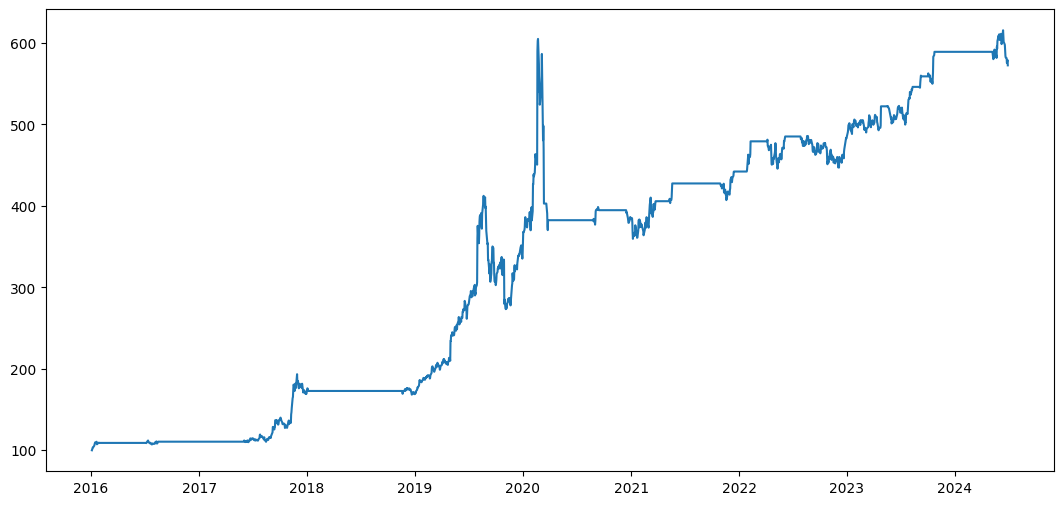

In [70]:
best_portfolio.index = pd.to_datetime(best_portfolio.index)
plt.figure(figsize=(13, 6))
plt.plot(best_portfolio.index, best_portfolio, label='portfolio')
plt.show()

In [11]:
best_portfolio.shape

(2136, 1)